<a href="https://colab.research.google.com/github/wvpssriraj10/PRODIGY_DS_02/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df_train = pd.read_csv("train.csv")


In [17]:
df_train.info()
df_train.describe()
df_train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df_train.isnull().sum()



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)


<ipython-input-19-64bbb888343d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)


In [20]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


<ipython-input-20-ad2723249ae2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


In [28]:
if 'Cabin' in df_train.columns:
    df_train['Has_Cabin'] = df_train['Cabin'].notnull().astype(int)
    df_train.drop(columns=['Cabin'], inplace=True)  # Drop original column
else:
    print("Cabin column already processed or not present in the DataFrame.")

Cabin column already processed or not present in the DataFrame.


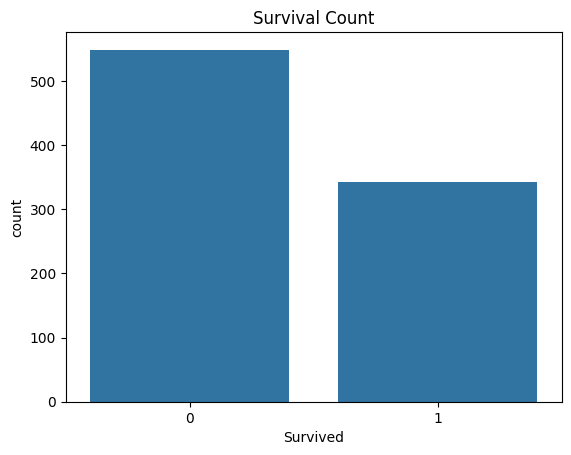

In [33]:
sns.countplot(x='Survived', data=df_train)
plt.title("Survival Count")
plt.show()


Text(0.5, 1.0, 'Survival Rate by Gender')

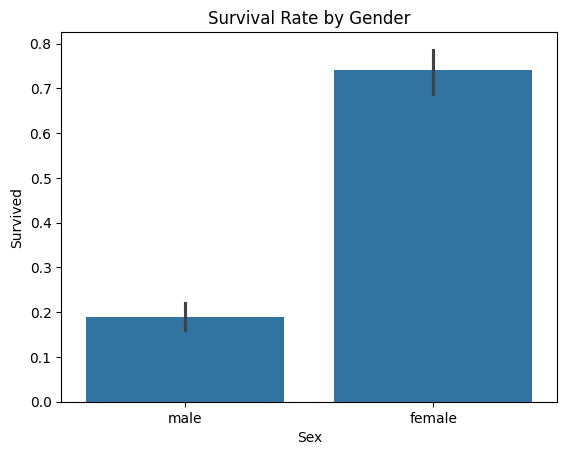

In [34]:
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.title("Survival Rate by Gender")


Text(0.5, 1.0, 'Survival Rate by Passenger Class')

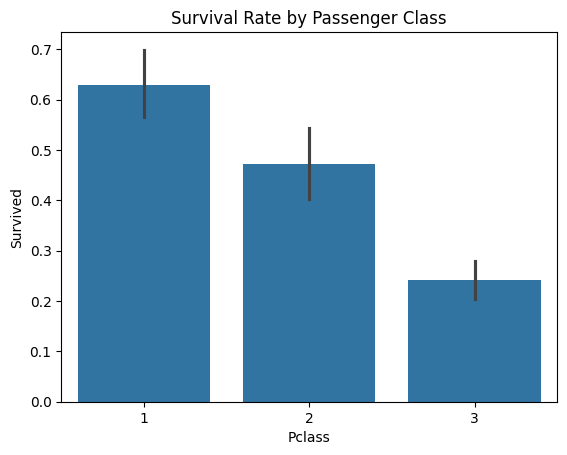

In [35]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title("Survival Rate by Passenger Class")


Text(0.5, 1.0, 'Age Distribution of Passengers')

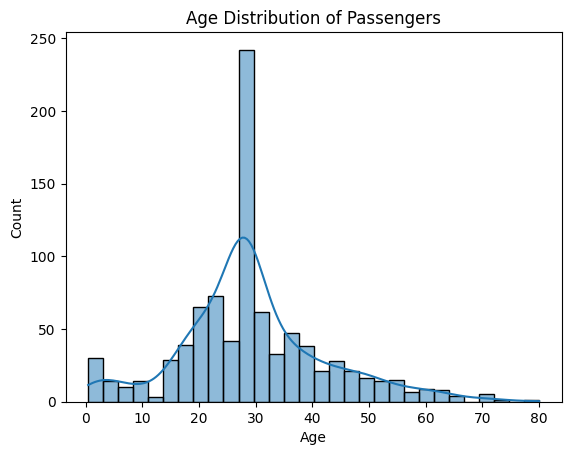

In [36]:
sns.histplot(df_train['Age'], kde=True, bins=30)
plt.title("Age Distribution of Passengers")


In [45]:
df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch'] + 1


In [52]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})


In [53]:
df_test = pd.read_csv("test.csv")
df_test.info()
df_test.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)


<ipython-input-54-1d1187f3d480>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].median(), inplace=True)


In [55]:
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)


<ipython-input-55-7c732bc497af>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
<ipython-input-55-7c732bc497af>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [57]:
df_test['Has_Cabin'] = df_test['Cabin'].notnull().astype(int)
df_test.drop(columns=['Cabin'], inplace=True)


In [58]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)


In [59]:
df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch'] + 1


In [60]:
df_submission = pd.read_csv("gender_submission.csv")
df_submission.head()
df_train['Prediction'] = (df_train['Sex'] == 1).astype(int)
accuracy = (df_train['Prediction'] == df_train['Survived']).mean()
print(f"Accuracy of gender-based model: {accuracy:.2%}")


Accuracy of gender-based model: 61.62%


In [61]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Family_Size', 'Has_Cabin']
X_train = df_train[features]
y_train = df_train['Survived']

X_test = df_test[features]
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

y_pred = model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred):.2%}")
predictions = model.predict(X_test)

submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)


Validation Accuracy: 72.63%
